<a href="https://colab.research.google.com/github/yaba13/Vision-Based-American-Sign-Language-Recognition-SUST/blob/main/YOLOv7/Script/ASL_recognition_using_YOLOv7_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
#Define epochs for all models.
epochs = 50

train = pd.read_csv('/content/drive/MyDrive/ASL SSD/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/ASL SSD/sign_mnist_test.csv')

In [ ]:

#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

In [ ]:


#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  N


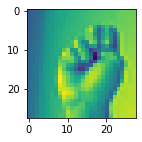

In [ ]:

#Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28))) 
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

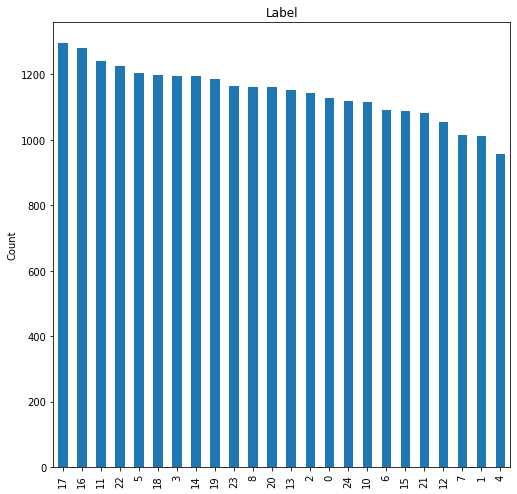

In [ ]:

# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [ ]:

#Dataset seems to be fairly balanced.

#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [ ]:

#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [ ]:

#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [ ]:



#########################################################
#Model 1

#Defining the Convolutional Neural Network
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(25, activation = 'softmax'))

In [ ]:
#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
#Training the CNN model1
#history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history1 = model1.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

model1.save('saved_models/model1.hdf5')


Epoch 1/50
215/215 [==============================] - 15s 13ms/step - loss: 2.5233 - acc: 0.2250 - val_loss: 1.4410 - val_acc: 0.5369
Epoch 2/50
215/215 [==============================] - 2s 9ms/step - loss: 1.0296 - acc: 0.6545 - val_loss: 0.7106 - val_acc: 0.7312
Epoch 3/50
215/215 [==============================] - 2s 7ms/step - loss: 0.5625 - acc: 0.8104 - val_loss: 0.4378 - val_acc: 0.8486
Epoch 4/50
215/215 [==============================] - 2s 7ms/step - loss: 0.3627 - acc: 0.8796 - val_loss: 0.3749 - val_acc: 0.8719
Epoch 5/50
215/215 [==============================] - 2s 7ms/step - loss: 0.2450 - acc: 0.9205 - val_loss: 0.2706 - val_acc: 0.9129
Epoch 6/50
215/215 [==============================] - 2s 7ms/step - loss: 0.1735 - acc: 0.9435 - val_loss: 0.2682 - val_acc: 0.9064
Epoch 7/50
215/215 [==============================] - 1s 7ms/step - loss: 0.1330 - acc: 0.9575 - val_loss: 0.2379 - val_acc: 0.9173
Epoch 8/50
215/215 [==============================] - 2s 7ms/step - loss: 

In [ ]:
##########################################################
#Model2

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(25, (1,1)))

model2.add(Flatten())

model2.add(Dense(25, activation = 'softmax'))

model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model2.summary()

history2 = model2.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

model2.save('saved_models/model2.hdf5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)          36928     
                                                      

In [ ]:
###################################################################
#Model 3
#
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(25, activation = 'softmax'))


In [ ]:
#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [ ]:

#Training the CNN model1
#history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history3 = model3.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

model3.save('saved_models/model3.hdf5')

Epoch 1/50
215/215 [==============================] - 2s 7ms/step - loss: 2.0087 - acc: 0.4120 - val_loss: 1.0715 - val_acc: 0.6997
Epoch 2/50
215/215 [==============================] - 1s 7ms/step - loss: 0.5877 - acc: 0.8201 - val_loss: 0.5683 - val_acc: 0.8232
Epoch 3/50
215/215 [==============================] - 1s 7ms/step - loss: 0.2594 - acc: 0.9238 - val_loss: 0.4273 - val_acc: 0.8649
Epoch 4/50
215/215 [==============================] - 1s 7ms/step - loss: 0.1385 - acc: 0.9627 - val_loss: 0.3433 - val_acc: 0.8995
Epoch 5/50
215/215 [==============================] - 1s 6ms/step - loss: 0.0832 - acc: 0.9798 - val_loss: 0.2902 - val_acc: 0.9250
Epoch 6/50
215/215 [==============================] - 1s 6ms/step - loss: 0.0541 - acc: 0.9879 - val_loss: 0.2889 - val_acc: 0.9235
Epoch 7/50
215/215 [==============================] - 1s 7ms/step - loss: 0.0407 - acc: 0.9904 - val_loss: 0.2861 - val_acc: 0.9260
Epoch 8/50
215/215 [==============================] - 1s 6ms/step - loss: 0.

In [ ]:


#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('saved_models/model1.hdf5')
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/model3.hdf5')

models = [model1, model2, model3]

preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)


225/225 [==============================] - 0s 2ms/step


In [ ]:

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)



prediction1 = np.argmax(model1.predict(X_test),axis=1)
prediction2 = np.argmax(model2.predict(X_test),axis=1)
prediction3 = np.argmax(model3.predict(X_test),axis=1)

accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

225/225 [==============================] - 0s 2ms/step
Accuracy Score for model1 =  0.9535694366982711
Accuracy Score for model2 =  0.89138315672058
Accuracy Score for model3 =  0.9421360847741216
Accuracy Score for average ensemble =  0.9687674288901282


In [ ]:
########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(y_test, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


225/225 [==============================] - 0s 2ms/step
Accuracy Score for model1 =  0.9535694366982711
Accuracy Score for model2 =  0.89138315672058
Accuracy Score for model3 =  0.9421360847741216
Accuracy Score for average ensemble =  0.9687674288901282
Accuracy Score for weighted average ensemble =  0.9715560513106526


In [ ]:

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(X_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(y_test, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[0], " obained with w1=", max_acc_row[1],
      " w2=", max_acc_row[2], " and w3=", max_acc_row[3])         




225/225 [==============================] - 0s 2ms/step
Max accuracy of  0.4  obained with w1= 0.1  w2= 0.3  and w3= 97.42052426101506


In [ ]:

###########################################################################
### Explore metrics for the ideal weighted ensemble model. 

models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2] 

225/225 [==============================] - 0s 2ms/step


Predicted Label:  K
True Label:  K


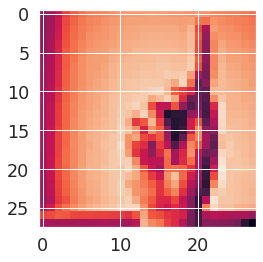

In [ ]:



#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)



i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns

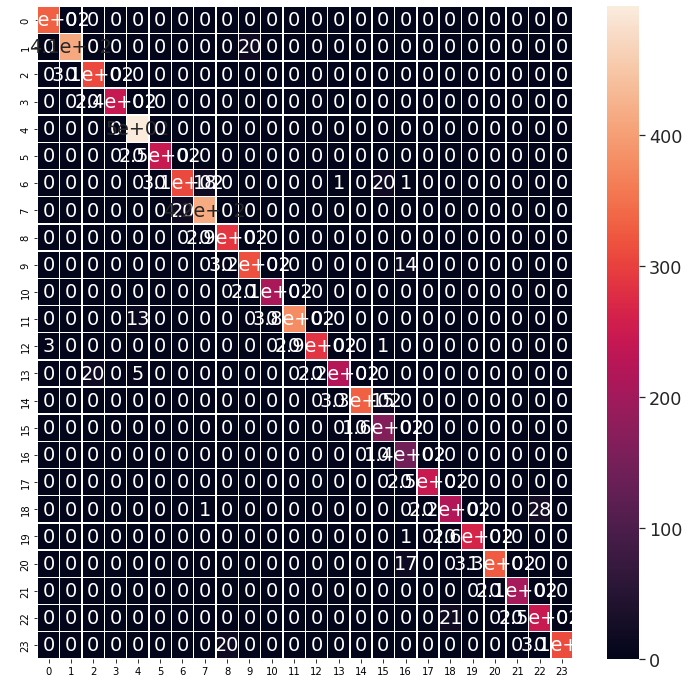

In [ ]:

#Print confusion matrix
cm = confusion_matrix(y_test, ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


([<matplotlib.axis.XTick at 0x7feca6542400>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E'),
  Text(0, 0, 'F'),
  Text(0, 0, 'G'),
  Text(0, 0, 'H'),
  Text(0, 0, 'I'),
  Text(0, 0, 'J'),
  Text(0, 0, 'K'),
  Text(0, 0, 'L'),
  Text(0, 0, 'M'),
  Text(0, 0, 'N'),
  Text(0, 0, 'O'),
  Text(0, 0, 'P'),
  Text(0, 0, 'Q'),
  Text(0, 0, 'R'),
  Text(0, 0, 'S'),
  Text(0, 0, 'T'),
  Text(0, 0, 'U'),
  Text(0, 0, 'V'),
  Text(0, 0, 'W'),
  Text(0, 0, 'X')])

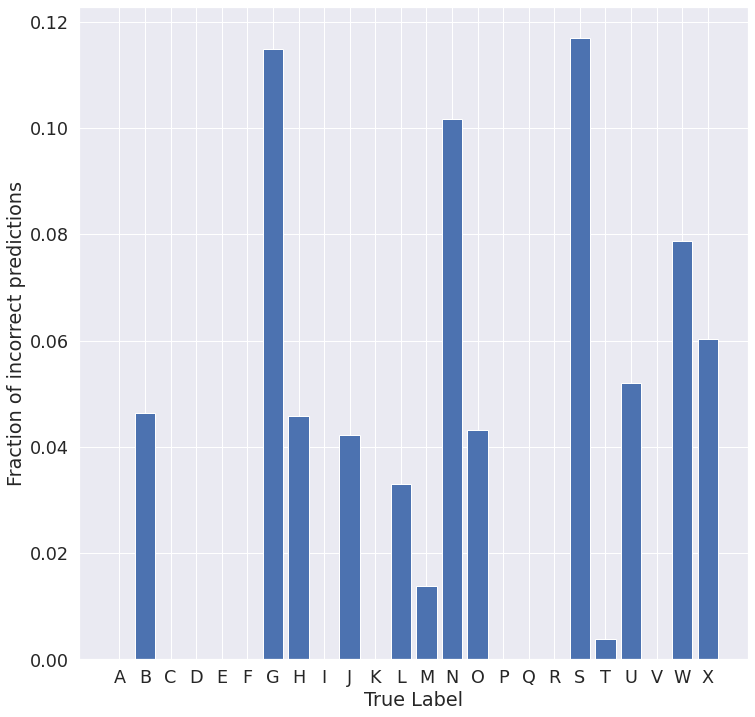

In [ ]:


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 


